# Load Datasets

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
raw_df = pd.read_csv('/content/dataset.csv')



```
# This is formatted as code
```

## Descriptive Statistics

Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil observasinya, seperti:
1. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?
2. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
3. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)
* Untuk masing-masing jenis observasi, tuliskan juga jika tidak ada masalah,
  misal untuk A: “Semua tipe data sudah sesuai”

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12946 entries, 0 to 12945
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12835 non-null  float64
 1   Administrative_Duration  12313 non-null  float64
 2   Informational            12946 non-null  int64  
 3   Informational_Duration   12946 non-null  float64
 4   ProductRelated           12946 non-null  int64  
 5   ProductRelated_Duration  12307 non-null  float64
 6   BounceRates              12872 non-null  float64
 7   ExitRates                12946 non-null  float64
 8   PageValues               12946 non-null  float64
 9   SpecialDay               12946 non-null  float64
 10  Month                    12946 non-null  object 
 11  OperatingSystems         12422 non-null  float64
 12  Browser                  12946 non-null  int64  
 13  Region                   12946 non-null  int64  
 14  TrafficType           

terdapat 12946 baris data, dengan jumlah attribut 18. Dari 18 attribut, dideteksi ada 5 attribut yang memiliki nilai kosong.

In [4]:
nums = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
cats = ['Month', 'VisitorType', 'Weekend', 'Revenue']

In [5]:
raw_df[nums].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12835.000000,12313.000000,12946.000000,12946.000000,12946.000000,12307.000000,12872.000000,12946.000000,12946.000000,12946.000000,12422.000000,12946.000000,12946.000000,12946.000000
mean,2.303857,80.370267,0.498841,34.136048,31.657655,1192.740077,0.022309,0.043266,5.875963,0.061270,2.123169,2.360497,3.144369,4.078248
std,3.314427,175.494016,1.263276,140.022848,44.202635,1910.216261,0.048681,0.048808,18.414670,0.198667,0.906264,1.718878,2.402477,4.025467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,182.083333,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.000000,0.000000,0.000000,18.000000,599.583333,0.003112,0.025329,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,92.933333,0.000000,0.000000,38.000000,1470.522917,0.016933,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [8]:
raw_df[cats].describe()

,Month,VisitorType,Weekend,Revenue
count,12946,12946,12946,12946
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,3533,11072,9929,10938


In [9]:
raw_df['Month'].nunique()

10

Berdasarkan Descriptive Statistic ada beberapa hal yang sudah dapat disimpulkan:
- Beberapa kolom numerik *skew* (dilihat dari perbedaan yang besar antara *mean* dan *median*) seperti `Administrative_Duration`, `Informational_Duration`, dan `ProductRelated_Duration`
- Tidak ada kolom kategori yang perlu didrop karena hanya punya 1 nilai unik atau punya nilai unik sebanyak jumlah baris
- Ada kolom-kolom dengan nilai `null`

## Univariate Analysis

Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

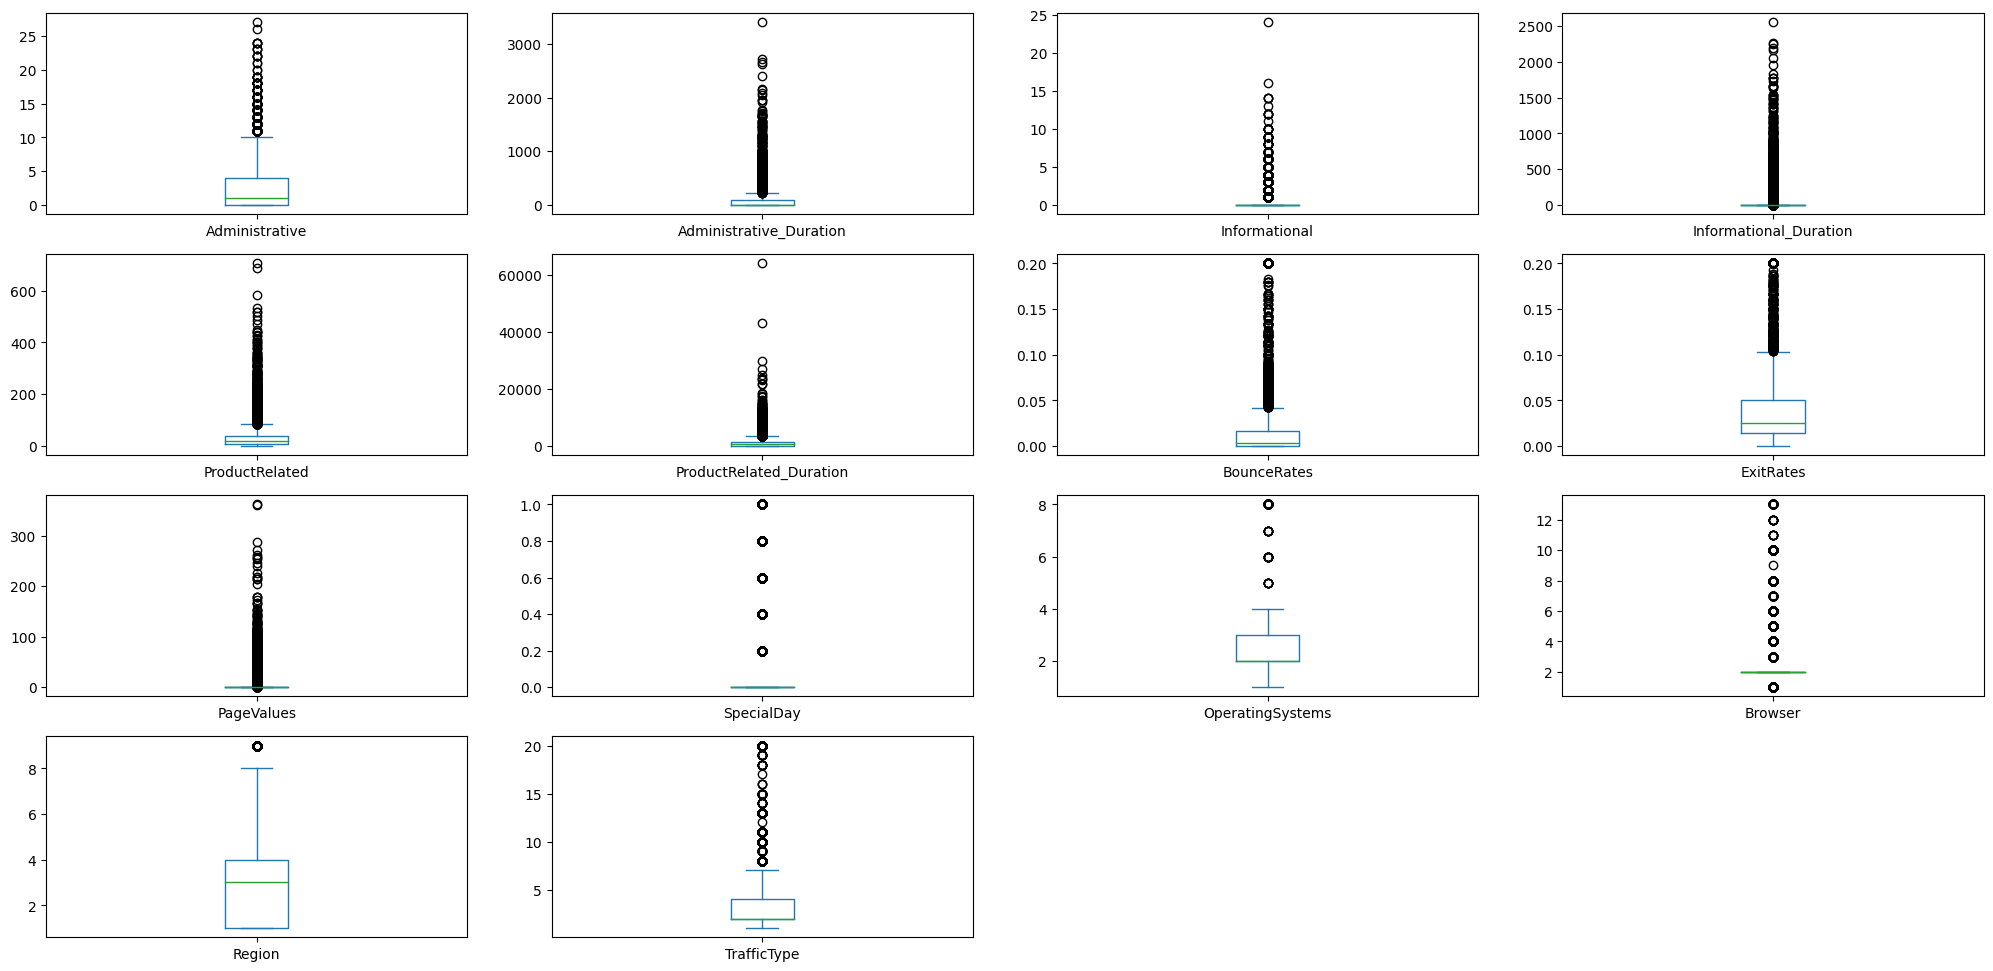

In [11]:
raw_df[nums].plot(kind='box', subplots=True, layout=(4,4), sharex=False, figsize=(25, 12));

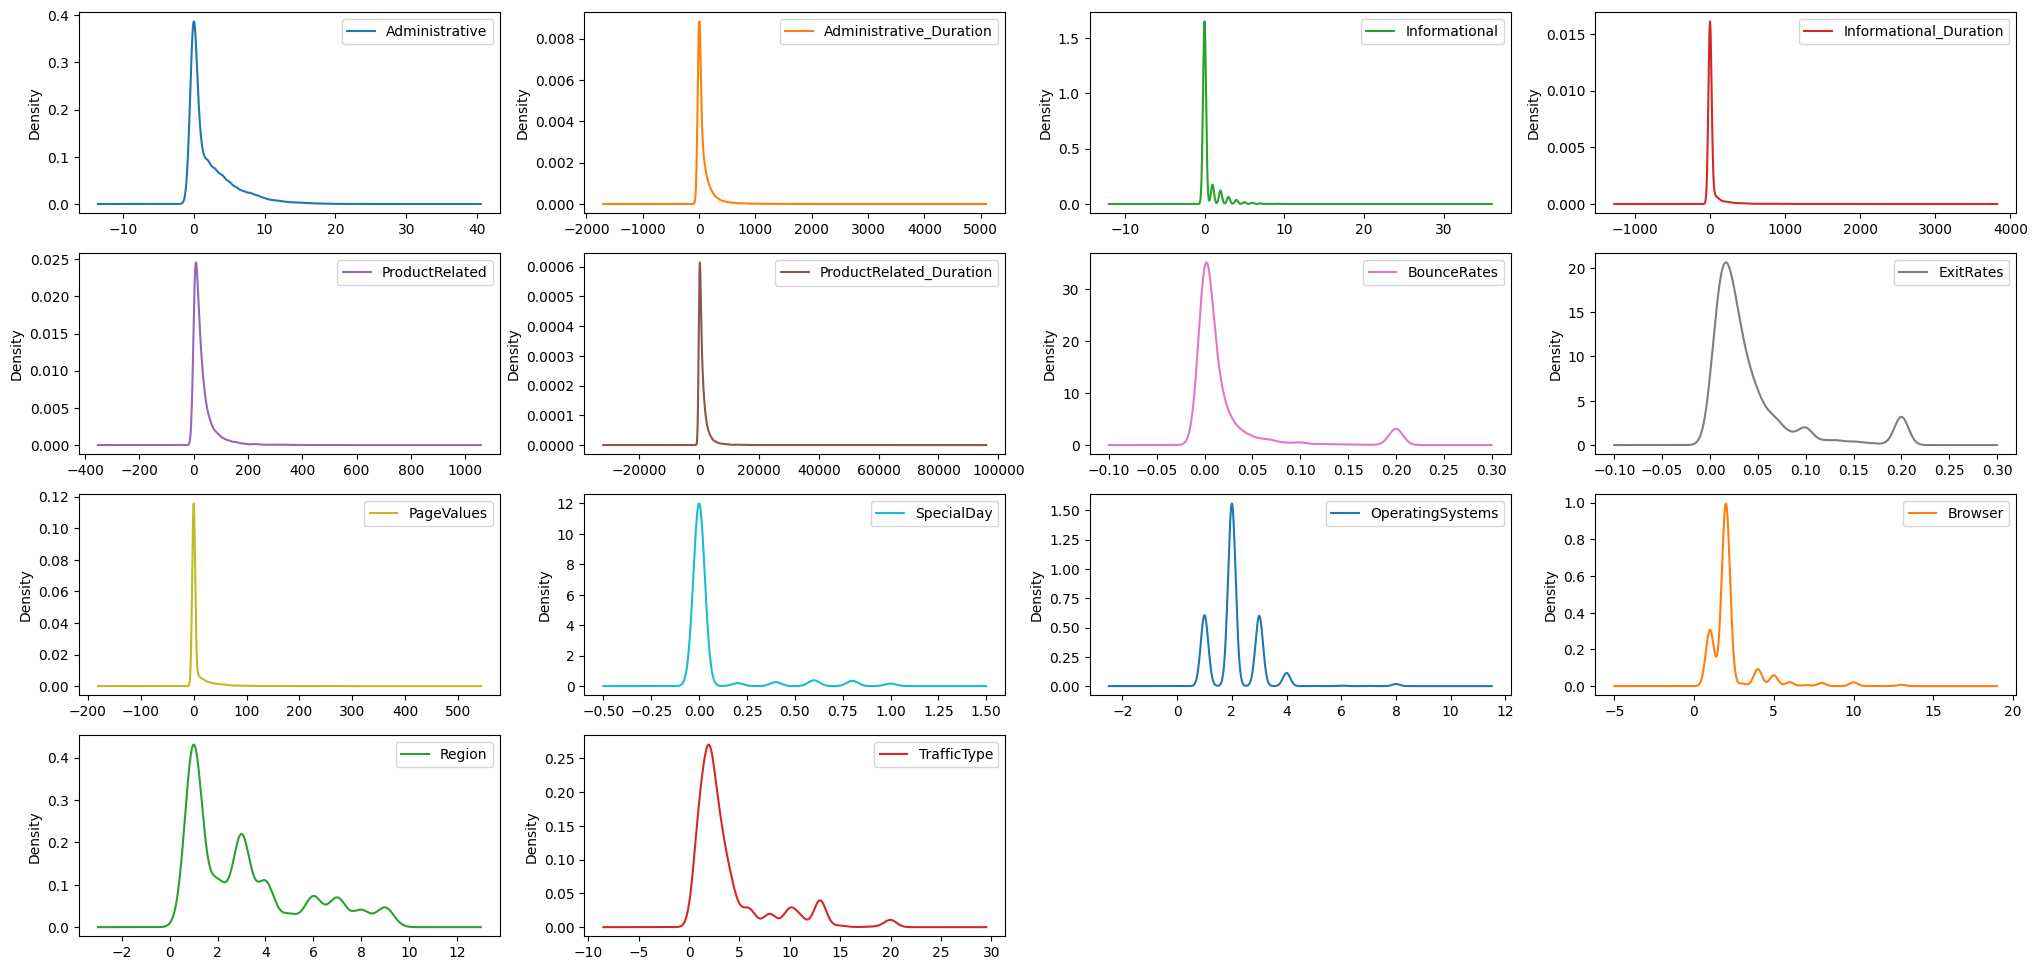

In [13]:
raw_df[nums].plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(25, 12));

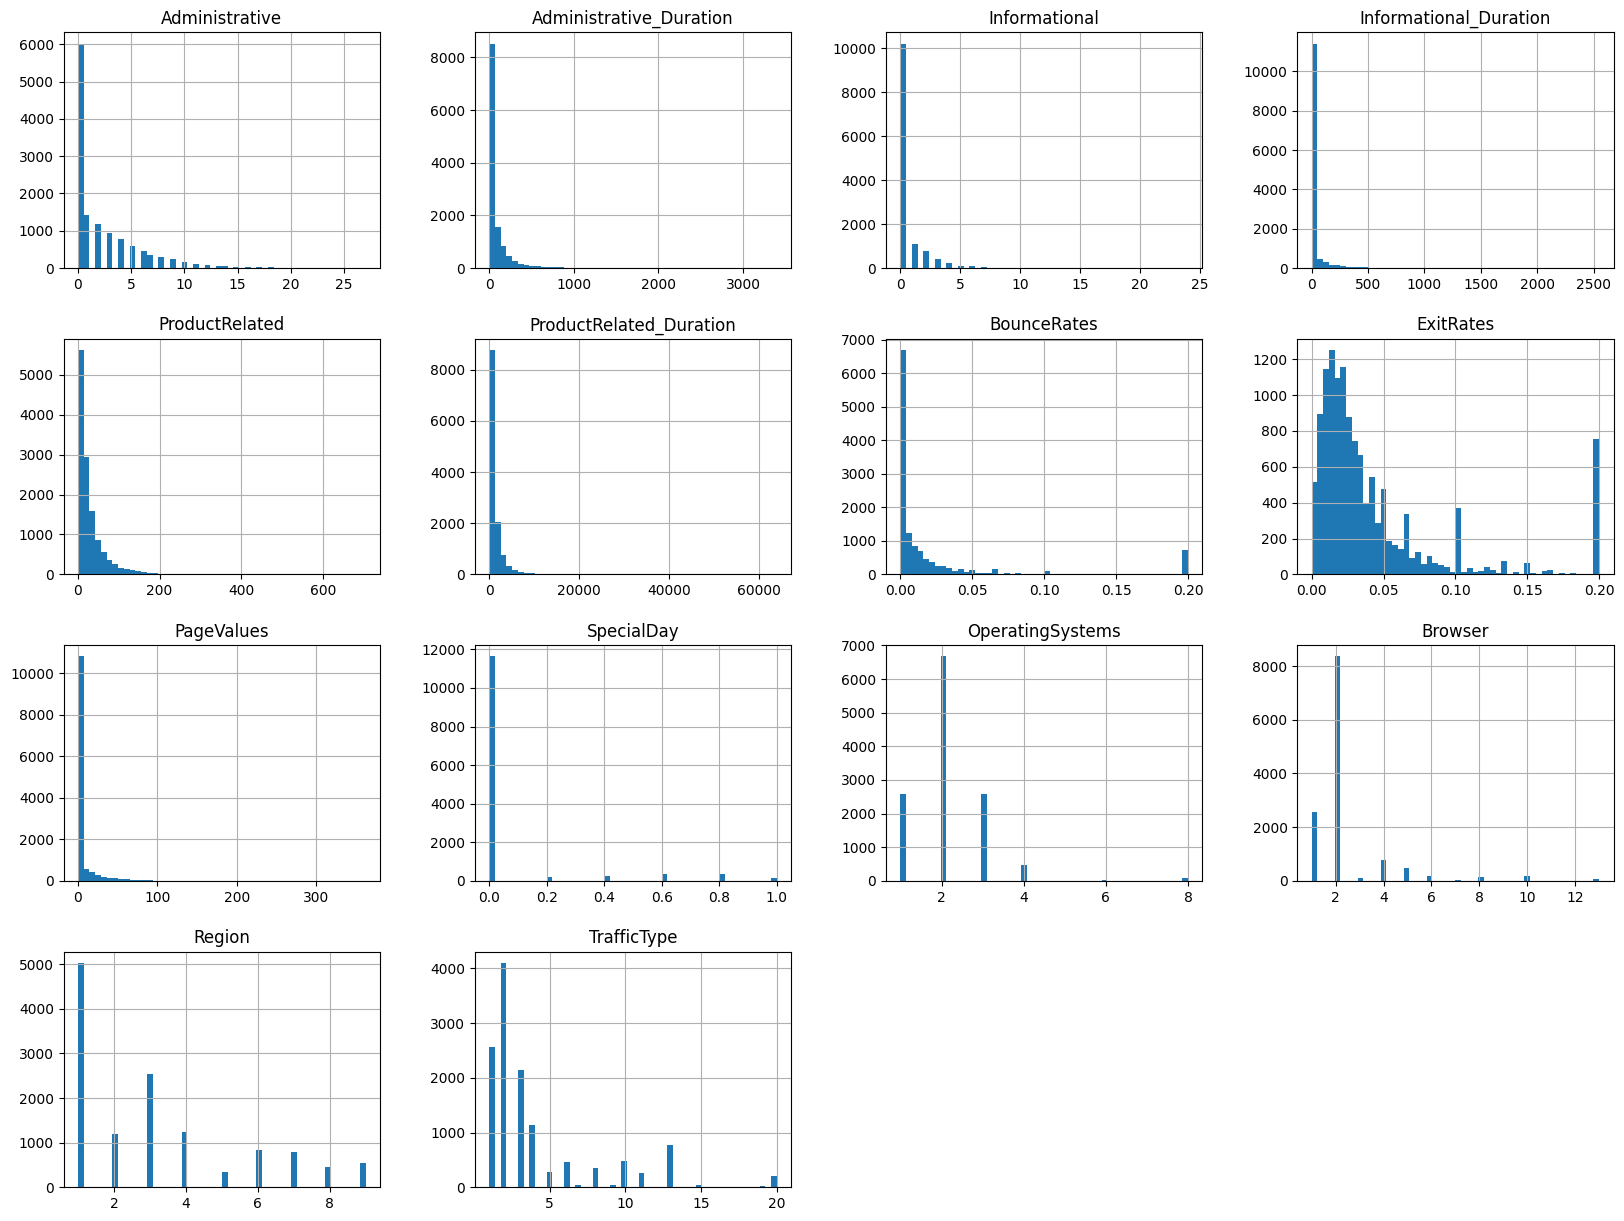

In [26]:
raw_df.hist(bins=50, figsize=(20,15))
plt.show()

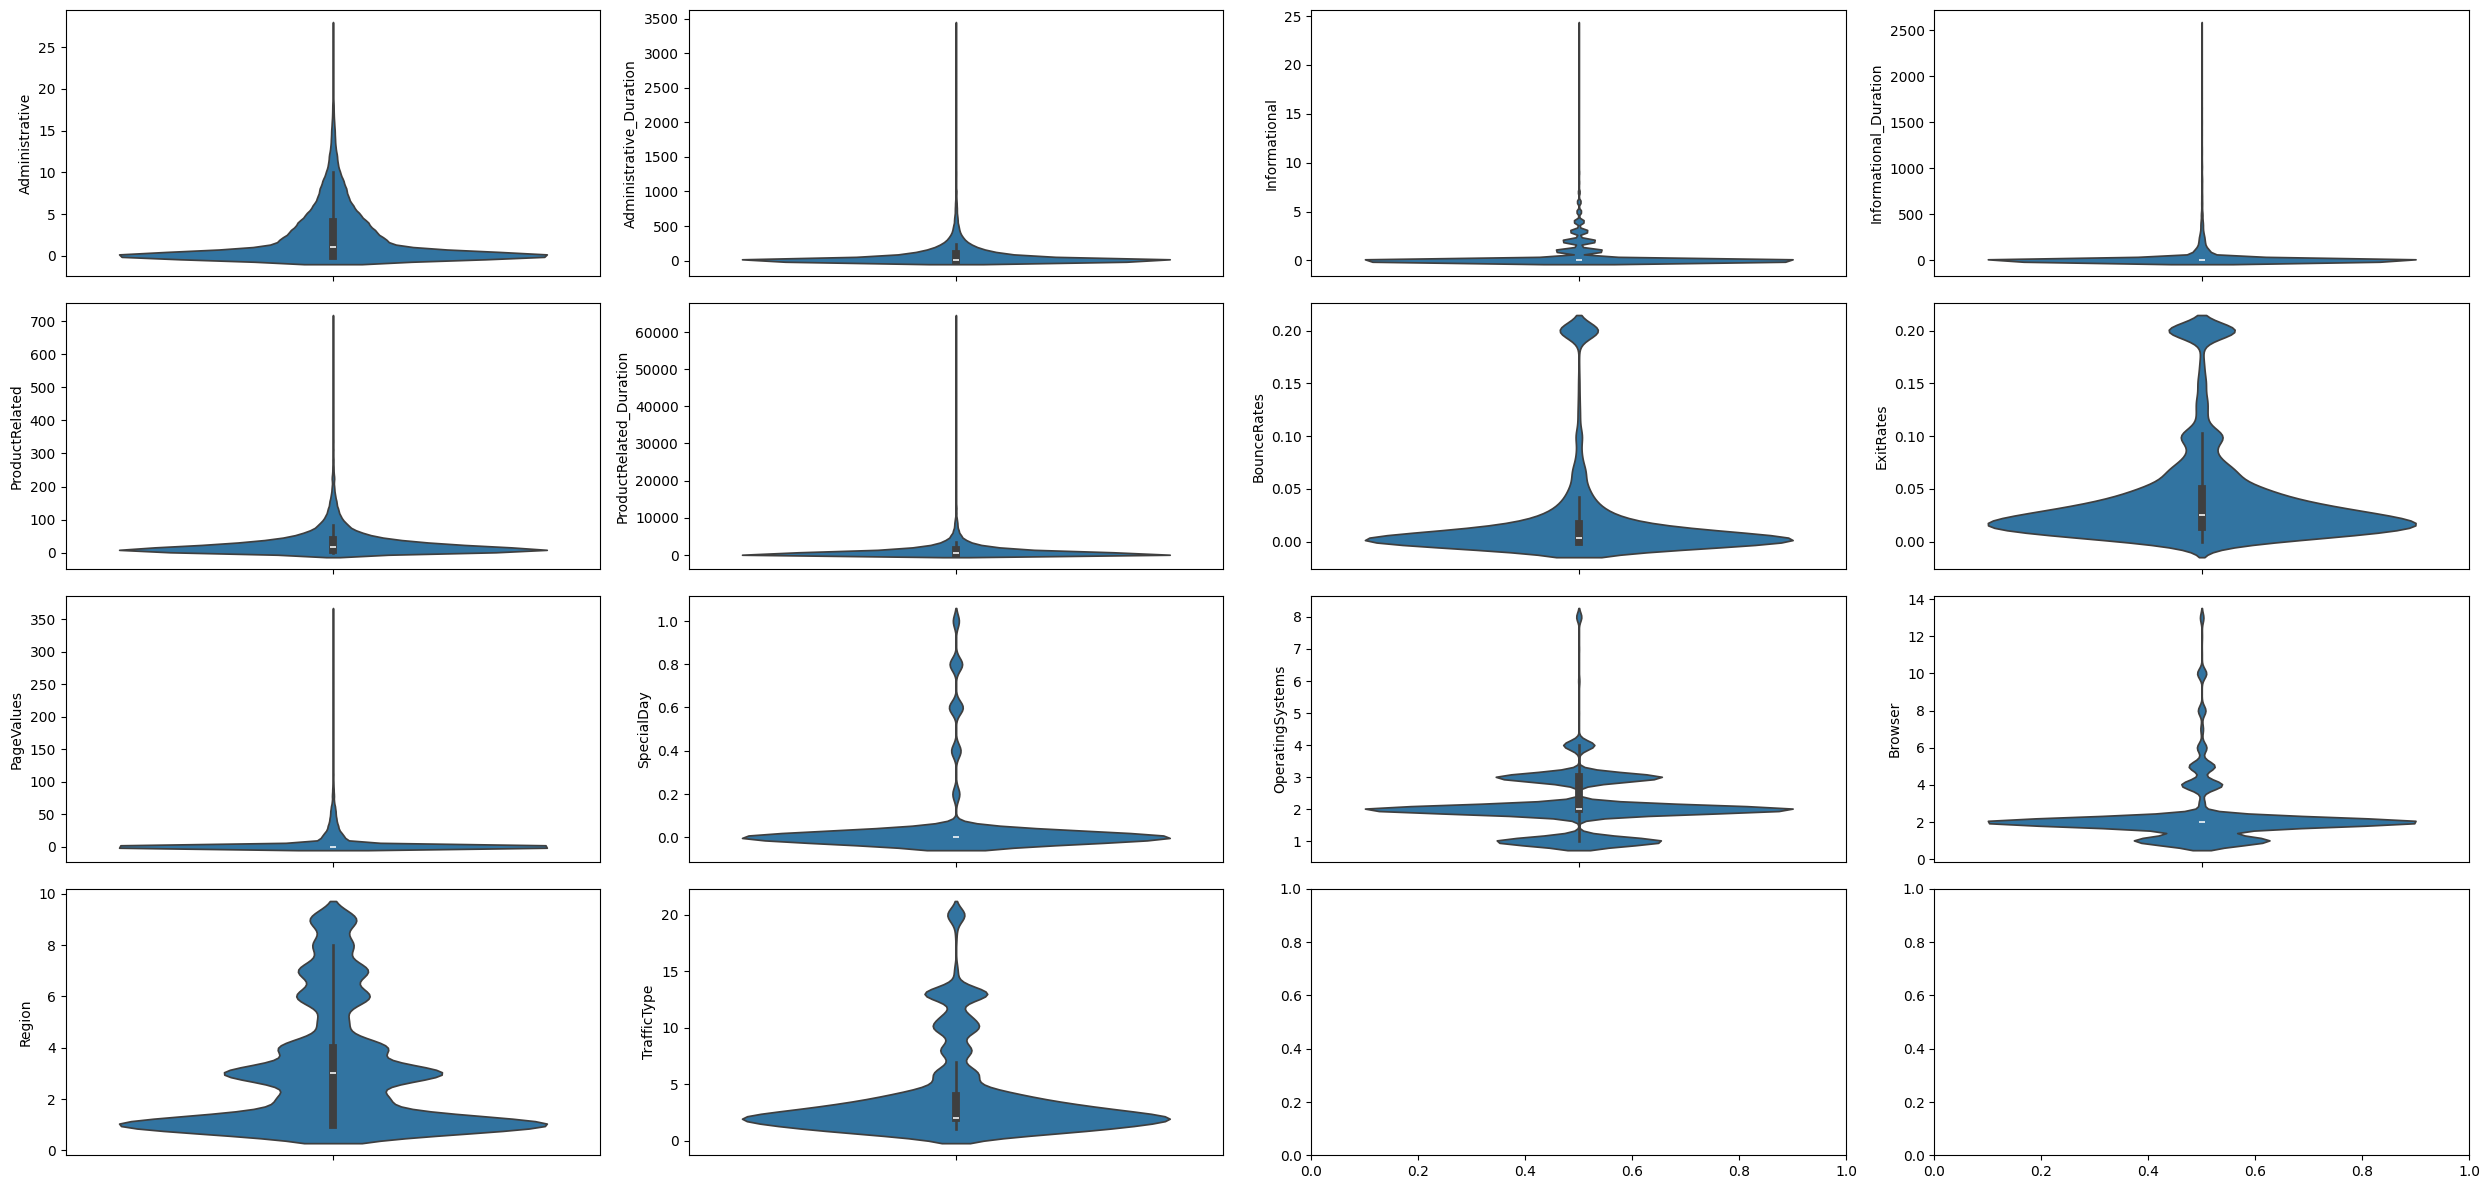

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'raw_df' is your DataFrame and 'nums' is the list of numerical columns
fig, axes = plt.subplots(4, 4, figsize=(25, 12))
axes = axes.flatten()

for i, col in enumerate(nums):
    sns.violinplot(data=raw_df[col], ax=axes[i])

plt.tight_layout()
plt.show()

Adapun berdasarkan analisis berikut adalah kolom-kolom yang menunjukkan distribusi skewed, bimodal, dan uniform:

Skewed: Kolom administrative, Informational_Duration

Bimodal: Administrative_Duration

Uniform: Informational




## Multivariate Analysis

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang diajarkan di kelas). Tuliskan hasil observasinya, seperti:
Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?
* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

<ipython-input-25-f5f8a40257db>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_df.corr(),annot=True,cmap='Blues',linewidths=.5)


<Axes: >

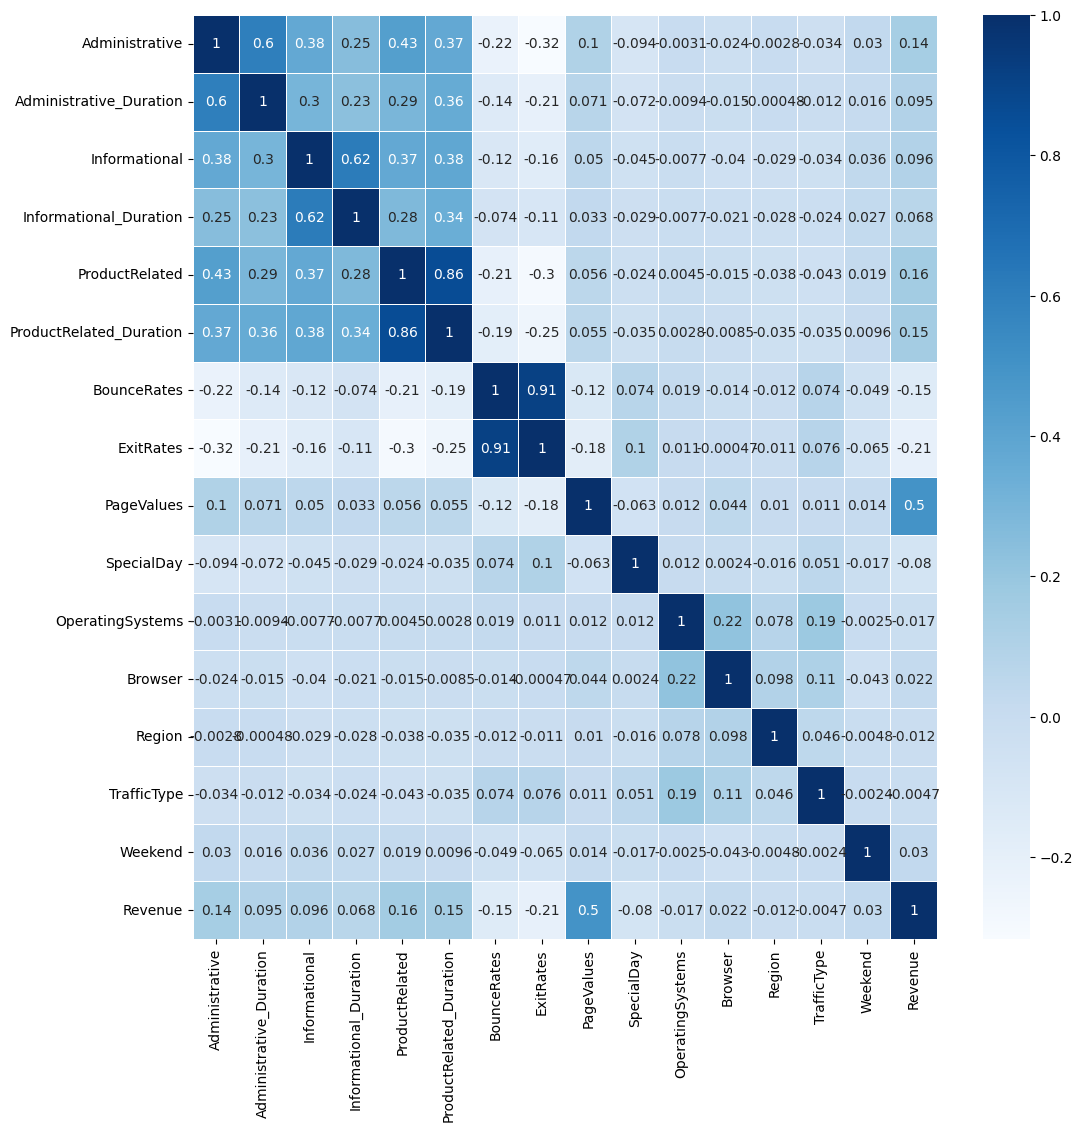

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(raw_df.corr(),annot=True,cmap='Blues',linewidths=.5)

<ipython-input-27-0dd3ea18ffeb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_df.corr(method='spearman'),annot=True,cmap='Blues',linewidths=.5)


<Axes: >

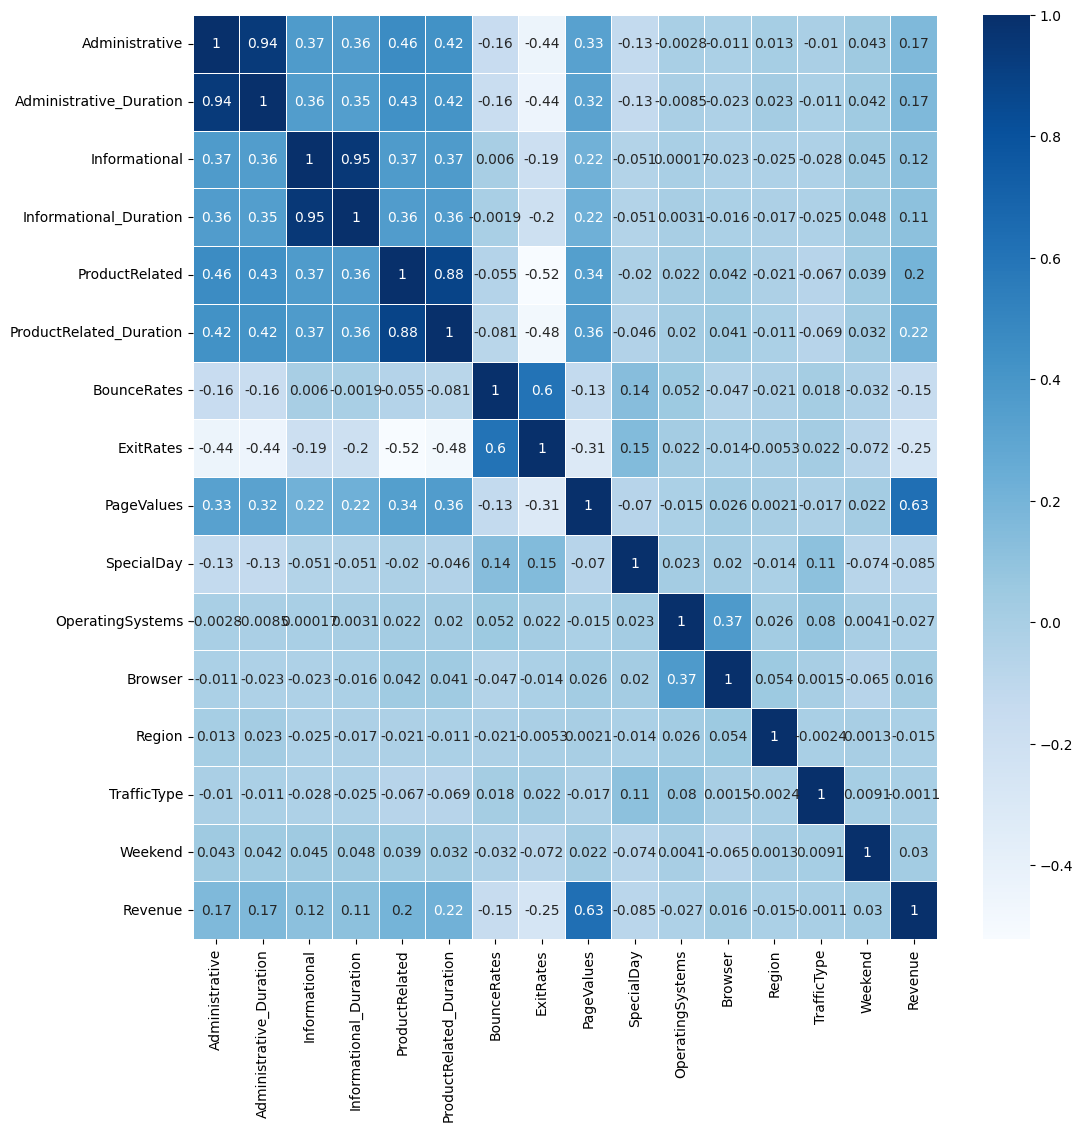

In [27]:
plt.figure(figsize=(12,12))
sns.heatmap(raw_df.corr(method='spearman'),annot=True,cmap='Blues',linewidths=.5)

<ipython-input-28-8e22e5a2dfd5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_df.corr(method='kendall'),annot=True,cmap='Blues',linewidths=.5)


<Axes: >

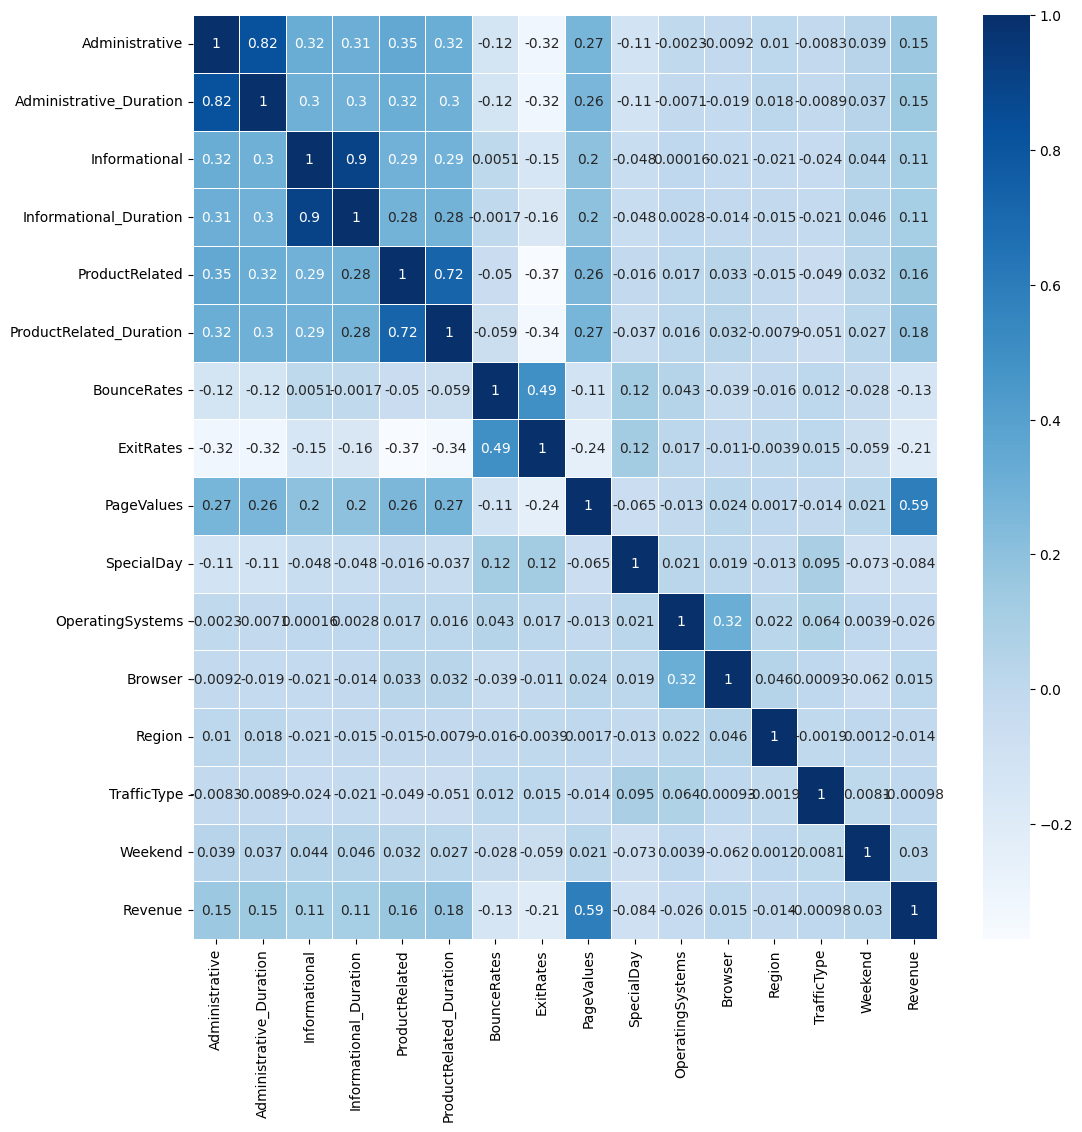

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(raw_df.corr(method='kendall'),annot=True,cmap='Blues',linewidths=.5)

## Business Insight
Selain EDA, lakukan juga beberapa analisis dan visualisasi untuk menemukan suatu
business insight. Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan
rekomendasinya untuk bisnis.

Berdasarkan dari analisis data tersebut didaptkan sebuah, sebagai berikut:

1. Insight: Bounce rate dan exit rate memiliki korelasi negatif sedang dengan nilai label.

2. Rekomendasi:
Pertimbangkan untuk mengoptimalkan desain dan konten website untuk mengurangi bounce rate dan exit rate.
Lakukan A/B testing untuk menemukan desain dan konten website yang paling efektif dalam mengurangi bounce rate dan exit rate.
Permudah navigasi website dan tingkatkan kecepatan loading untuk meningkatkan user experience dan mengurangi bounce rate dan exit rate.

## Git
Upload project teman-teman di sebuah repository git. Berkolaborasilah di Git jika ada
perubahan version dari waktu ke waktu.
A. Buat Repository Git
B. Upload file notebook atau file pengerjaan lainnya pada repository tersebut
Untuk file README, dapat merupakan summary insight yang telah didapatkan dari EDA.